# This is a Web Scrapping (end to end project) for Zimbabwe Real Estate market using Python, SQL and Power BI.

    The Zimbabwe housing market presents a unique challenge for potential buyers and investors due to the lack of centralized and up-to-date information regarding property listings, prices, and market trends. This scarcity of accessible data hinders informed decision-making processes for individuals and organizations interested in buying, selling, or investing in real estate within Zimbabwe.

#### Objective

    The objective of this project is to develop an end-to-end ETL (Extract, Transform, Load) process using Python, SQL, and Power BI to collect, process, analyze, and visualize data related to the Zimbabwe housing market. By leveraging web scraping techniques, I aim to extract property listing information from various online sources, transform and standardize the data, and load it into a centralized MSSQL database. Subsequently, I will utilize SQL queries and data processing techniques to derive valuable insights such as average property prices, location-wise trends, and market dynamics. Finally, I will create interactive dashboard using Power BI to visualize these insights in a user-friendly manner, enabling stakeholders to make well-informed decisions regarding real estate transactions in Zimbabwe.

#### Key Deliverables
    
    1. Web Scraping Module: To develop a Python-based web scraping module to extract property listing data from multiple online sources, including real estate websites, classified ads, and property portals operating within Zimbabwe.
    
    2. Data Processing Pipeline: To design and implement a robust ETL process to cleanse, transform, and standardize the scraped data. This involves handling missing values, standardizing property attributes, and enriching the dataset with additional information where applicable.
    
     3. SQL Database: To create and maintain a relational database using SQL Server (Structured Query Language) to store the processed housing market data. Define appropriate table structures to accommodate different types of property listings and associated attributes.
     
    4. Data Analysis: To utilize SQL queries and data manipulation techniques to perform exploratory data analysis (EDA) on the housing market dataset. Extract insights regarding average property prices, popular locations, property types, and market trends over time. 
    
    5. Visualization and Reporting: To develop interactive dashboards and visual reports using Power BI to present the findings of the data analysis in a visually appealing and informative manner. Incorporate filters, slicers, and drill-down capabilities to facilitate dynamic exploration of the housing market data.
    
    6. Documentation: To prepare comprehensive documentation covering the project workflow, data sources, data processing steps, SQL schema, and Power BI reports. 

#### Outcomes

    1. A scalable ETL pipeline capable of continuously fetching, processing, and updating housing market data from online sources.or. 
    
    2. Insights into key metrics and trends within the Zimbabwe housing market
    
    3. Interactive Power BI dashboard providing intuitive visualization of housing market dynamics, accessible to both technical and non-technical users.

### 1. THE DATA EXTRACTION IN PYTHON WITH BEAUTIFUL SOUP

### Importing libraries for scrapping

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

<br>

#### Hidden here is the code trials for a 1 page scrapper being the building blocks to the multi page scrapper below

In [ ]:
#using variable url to store the url 

url = "https://www.sellinghouses/pseudo_name?page=1"

page = requests.get(url, verify = False)

soup = BeautifulSoup(page.content, "html.parser")

In [3]:
#finding all sections with class name "details col-md-7 col-sm-7 col-xs-8" and tag 'div', and storing them in variable name sections1 
sections = soup.find_all('div', class_ = "details col-md-7 col-sm-7 col-xs-8")

In [32]:
# In all the sections we want to find the data under name, location, price and area

# for loop will help us to go through all subsections with the class names that hold the features we are looking for

data = []
for subs in sections:
    
    title = subs.find('h5', class_ = 'listing-title').text.strip()
    price = subs.find('div', class_ = 'pull-left usd-price-tooltip').text.strip()
    
    features = subs.find_all('li', class_ = 'property')
    for tags in features: 
        if len(features) == 4:
            bedrooms = features[-4].text 
            bathrooms = features[-3].text
            area = features[-2].text
            location = features[-1].text
        elif len(features) == 3:
            bedrooms = features[-3].text 
            bathrooms = 'not stated'
            area = features[-2].text
            location = features[-1].text
        else:
            bedrooms = 'not stated'
            bathrooms = 'not stated'
            area = features[-2].text
            location = features[-1].text 
            
    
    #Storing the information into variable data
    data.append([title, price, bedroomsarea, location])
    
data

[['Glen Lorne - House',
  '$3,200,000',
  '5 bedrooms',
  '4 bathrooms',
  '56280 m²',
  'harare north'],
 ['Arlington - Townhouse Complex, House',
  '$125,000',
  '3 bedrooms',
  '2 bathrooms',
  '324 m²',
  'harare south'],
 ['Athlone - House',
  '$250,000',
  '3 bedrooms',
  'not stated',
  '3600 m²',
  'harare east'],
 ['Banket - House',
  '$160,000',
  '3 bedrooms',
  '2 bathrooms',
  '3092 m²',
  'banket'],
 ['Ashdown Park - House',
  '$55,000',
  '6 bedrooms',
  '4 bathrooms',
  '500 m²',
  'harare west'],
 ['Riverside North - House',
  '$138,000',
  '2 bedrooms',
  '1 bathrooms',
  '10000 m²',
  'bulawayo east'],
 ['Chisipite - House',
  '$475,000',
  '3 bedrooms',
  '2 bathrooms',
  '4070 m²',
  'harare north'],
 ['Mandara - House',
  '$400,000',
  '4 bedrooms',
  '3 bathrooms',
  '4703 m²',
  'harare east'],
 ['Glen Lorne - House',
  '$360,000',
  '3 bedrooms',
  '2 bathrooms',
  '4599 m²',
  'harare north'],
 ['Chisipite - Townhouse Complex',
  '$500,000',
  '3 bedrooms',
  

<br>

### Scrapping the data

In [ ]:
#The website now had 173 pages as at 2 May 2024, hence we store our pages in the variable stop

stop = 173 # we will be scrapping all pages

# we take our url without the page number at the end as we will append at each iteration with the number in the range(1, stop+1)
url_base = "https://www.www.sellinghouses/pseudo_name?page="

# Creating an empty list to later store our data
data = []

# using for loop to iterate over the all the pages on the website

for x in range(1,stop+1): 
    
    new_url_base = f"{url_base}{x}"
    
    # Sending the request to the website to get the data and prompting it not to verify our request 
    web = requests.get(new_url_base, verify = False) 
    
    #urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    
    # if web status code is 200 it means that our request was successful
    if web.status_code == 200: 
        web_page = BeautifulSoup(web.content, 'html.parser')
        
        # We assign all the sections of the web to the variable listings 
        listings = web_page.find_all('div', class_ = "details col-md-7 col-sm-7 col-xs-8")
        
        # having assigned all house listings into the variable listings, we need now to scrap title, price, bedrooms, bathrooms, area and location
        
        # we locate the tag that the name is found in our BeautifulSoup object name webpage to find the tags and class name where we find the properties we want to scrap
            
        for listing in listings:
            
            title_element = listing.find('h5', class_ = 'listing-title')
            if title_element:
                title = listing.find('h5', class_ = 'listing-title').text.strip()
            else:
                title = 'untitled'

            
            price_element = listing.find('div', class_ = 'pull-left usd-price-tooltip')
            if price_element:
                price = listing.find('div', class_ = 'pull-left usd-price-tooltip').text.strip()
            else:
                price = 'no price'
        
            # now using web inspection we find out that location, area, bedrooms and bathrooms have the same tag and html class name
            
            # on some listings there is no number of bathrooms, hence we declare not stated where the is no data entry 
        
            # we use our method to find all tags with name 'li' and class name 'property' and assign them into features variable
            features = listing.find_all('li', class_ = 'property')
            
            # from browsing through the page we found out that property features are at most 4, thus bedrooms, bathrooms, area and location.
            if len(features) == 4:
                bedrooms = features[-4].text 
                bathrooms = features[-3].text
                area = features[-2].text
                location = features[-1].text
            elif len(features) == 3:
                bedrooms = features[-3].text 
                bathrooms = 'not stated'
                area = features[-2].text
                location = features[-1].text
            elif len(features) == 2:
                bedrooms = 'not stated'
                bathrooms = 'not stated'
                area = features[-2].text
                location = features[-1].text
            else:
                bedrooms = 'not stated'
                bathrooms = 'not stated'
                area = 'not stated'
                location = 'not stated'
        
                 
            #appending our informdation into the list data
            data.append([title, price, bedrooms, bathrooms, area, location])

### Creating a dataframe to load the list of the housing data

In [7]:
# since our result data is in a list we now create a dataframe for the scrapped data

zw_housing = pd.DataFrame(data, columns = ['title', 'price', 'bedrooms', 'bathrooms', 'area', 'location'])

In [8]:
zw_housing.head()

,title,price,bedrooms,bathrooms,area,location
0,Glen Lorne - House,"$3,200,000",5 bedrooms,4 bathrooms,56280 m²,harare north
1,"Arlington - Townhouse Complex, House","$125,000",3 bedrooms,2 bathrooms,324 m²,harare south
2,Athlone - House,"$250,000",3 bedrooms,not stated,3600 m²,harare east
3,Banket - House,"$160,000",3 bedrooms,2 bathrooms,3092 m²,banket
4,Ashdown Park - House,"$55,000",6 bedrooms,4 bathrooms,500 m²,harare west


In [9]:
# Checking the data entries we have loaded. We have 3306 listing in our data
zw_housing.shape

(3306, 6)

In [12]:
# Saving the data into a csv file

zw_housing.to_csv('zw_housing_data.csv')

<br>

### Loading the housing data into SQL Server

In [11]:
# we first start by importing our data (we avoid running the scrapper again since we did that part already)

zw_housing = pd.read_csv('zw_housing_data.csv')
zw_housing.head()

,Unnamed: 0,title,price,bedrooms,bathrooms,area,location
0,0,Glen Lorne - House,"$3,200,000",5 bedrooms,4 bathrooms,56280 m²,harare north
1,1,"Arlington - Townhouse Complex, House","$125,000",3 bedrooms,2 bathrooms,324 m²,harare south
2,2,Athlone - House,"$250,000",3 bedrooms,not stated,3600 m²,harare east
3,3,Banket - House,"$160,000",3 bedrooms,2 bathrooms,3092 m²,banket
4,4,Ashdown Park - House,"$55,000",6 bedrooms,4 bathrooms,500 m²,harare west


In [37]:
# We need to drop the column 'Unnamed: 0'

zw_housing.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [38]:
zw_housing.head(5)

,title,price,bedrooms,bathrooms,area,location
0,Glen Lorne - House,"$3,200,000",5 bedrooms,4 bathrooms,56280 m²,harare north
1,"Arlington - Townhouse Complex, House","$125,000",3 bedrooms,2 bathrooms,324 m²,harare south
2,Athlone - House,"$250,000",3 bedrooms,not stated,3600 m²,harare east
3,Banket - House,"$160,000",3 bedrooms,2 bathrooms,3092 m²,banket
4,Ashdown Park - House,"$55,000",6 bedrooms,4 bathrooms,500 m²,harare west


### We initiate loading the dataframe to the MSSQL database zw_housing

In [24]:
# Connecting to the SQL Server Database

server = 'MESAH\SQLEXPRESS'
database = 'Zim_Property_Data'

In [25]:
# Creating the connection string

conn_str = f'mssql+pyodbc://@{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server'

In [28]:
# table name where we are loading the data in MSSQL

table_name = 'zw_housing'

In [39]:
# Writing the DataFrame to SQL Server
zw_housing.to_sql(name=table_name, con=conn_str, if_exists='append', index=False)

165

We have successfully loaded the data into the database zw_housing 😃!!!! We now move on to MSSQL for the next steps (step number ii)

### 2. THE DATA TRANSFORMATION SECTION IN SQL SERVER

    -- In this section of the Web Scrapping project I will be cleaning the scrapped housing data into a readable format and standardize the data --

	-- The first step is creating a database using T-SQL with the query below

CREATE DATABASE Zim_Property_Data;
GO

USE Zim_Property_Data;
GO

	-- The next step is creating the table since we initiated our database

DROP IF TABLE EXISTS zw_housing

CREATE TABLE zw_housing
(title VARCHAR(100) NULL,
price VARCHAR(100) NULL,
bedrooms VARCHAR(100) NULL,
bathrooms VARCHAR(100) NULL,
area VARCHAR(100) NULL,
location VARCHAR(100)
);

	-- After creating the table we load the data from python using the sqlalchemy module
SELECT *
FROM zw_housing;

	-- In the transfomation process I will
	-- 1. Create a new column for house type from the title
	-- 2. Create a new column for surburb from the title
	-- 3. Create a new column for city/town from location 
	-- 4. Convert the price, bedrooms, bathrooms and area columns to integer data type
	-- 5. Check for NULL values in the data
	-- 6. Perform EDA on the data and share insights

	-- I work to achieve the steps above below

	-- 1. IN THE NEXT STEPS WE SOLVE POINTS 1,2 AND 3 

	-- We first create a view of the result we want using a combination SUBSTRING and CHARINDEX functions
SELECT 
SUBSTRING(title, 1, CHARINDEX('-', title)-1) AS 'Surburb',
SUBSTRING(title, CHARINDEX('-', title)+1, LEN(title) - CHARINDEX('-', title)) AS 'Property_type',
SUBSTRING(price,2,LEN(price) - CHARINDEX('-', price)) AS 'Price',
SUBSTRING(bedrooms, 1,1) AS 'Beds',
CASE
	WHEN bathrooms != 'not stated' THEN SUBSTRING(bathrooms, 1, 1) 
	ELSE bathrooms
END AS 'Baths',
SUBSTRING(area, 1, CHARINDEX(' ', area)-1) AS 'Area (m²)',
CASE
	WHEN CHARINDEX(' ', location) != 0 THEN SUBSTRING(location, 1, CHARINDEX(' ', location))
	ELSE location
END AS 'Town',
location AS 'Constituency'
FROM zw_housing;

	-- Now we create a staging of the table zw_housing to effect the transformations into the table
	-- Creating a table and we name it zw_housing1

CREATE TABLE zw_housing1
(Surburb VARCHAR(100) NULL,
Property_type VARCHAR(100) NULL,
Price VARCHAR(100) NULL,
Beds VARCHAR(100) NULL,
Baths VARCHAR(100) NULL,
Area_Sqm VARCHAR(100) NULL,
Town VARCHAR(100) NULL,
Constituency VARCHAR(100) NULL
)

	-- Inserting values from our earlier view into the staging of our original table, the new table zw_housing1
INSERT INTO zw_housing1
SELECT 
SUBSTRING(title, 1, CHARINDEX('-', title)-1) AS 'Surburb',
SUBSTRING(title, CHARINDEX('-', title)+1, LEN(title) - CHARINDEX('-', title)) AS 'Property_type',
SUBSTRING(price,2,LEN(price) - CHARINDEX('-', price)) AS 'Price',
SUBSTRING(bedrooms, 1,1) AS 'Beds',
CASE
	WHEN bathrooms != 'not stated' THEN SUBSTRING(bathrooms, 1, 1) 
	ELSE bathrooms
END AS 'Baths',
SUBSTRING(area, 1, CHARINDEX(' ', area)-1) AS 'Area (m²)',
CASE
	WHEN CHARINDEX(' ', location) != 0 THEN SUBSTRING(location, 1, CHARINDEX(' ', location))
	ELSE location
END AS 'Town',
location AS 'Constituency'
FROM zw_housing;

	-- Checking for the newly loaded data into zw_housing1
SELECT *
FROM zw_housing1;

	-- Removing properties that have no location data 
	-- There is need to stage again our table to ensure re-usability of the tables
	-- In this step I create the second staging of the housing table and name it zw_housing2

SELECT *
INTO zw_housing2
FROM zw_housing1
WHERE Constituency != 'not stated'

	-- Checking for the data entries with 'not stated' number of bathrooms
SELECT COUNT(Baths)
FROM zw_housing2
WHERE Baths = 'not stated';

	-- There are 1,215 properties where the number of bathrooms is not stated
	-- These data entries are a lot and we can't afford to lose them

	-- Updating the column baths with '1' where the Baths are not stated
UPDATE zw_housing2
SET Baths = '1'
WHERE Baths = 'not stated';

	-- There are anomalies under the Property_type column which we need to sort, some houses have both Complex and House type
	--	Removing the right blanks in the columns below
UPDATE zw_housing2
SET 
Surburb = RTRIM(Surburb),
Property_type = RTRIM(Property_type),
Price = RTRIM(Price),
Town = RTRIM(Town),
Constituency = RTRIM(Constituency)

	-- Checking if there is a blank space under entries in column Propert_type
SELECT *, LEN(Property_type)
FROM zw_housing2
	-- Property Type 'House' has length of  which means that there is a blank space at the left end

	-- Removing blanks at the end of each entry under Property_Type
UPDATE zw_housing2
SET 
Surburb = LTRIM(Surburb),
Property_type = LTRIM(Property_type),
Price = LTRIM(Price),
Town = LTRIM(Town),
Constituency = LTRIM(Constituency)

	-- Checking if the updates have been effected
SELECT *, LEN(Property_type)
FROM zw_housing2
	-- The update has been effected since the legnth of the Propert type House is now 5 from 6 previously

	-- Standardizing the Property Type column to have proper property types, there are property type like 'House, Townhouse Complex' which need to  be cleaned to pick only one type  
SELECT DISTINCT(Property_type), COUNT(Surburb) OVER(PARTITION BY Property_type) AS 'Number of Properties'
FROM zw_housing2
WHERE Property_type != 'House' AND Property_type != 'Townhouse Complex'
	-- With the query above we can see the number of Properties that have wrong or improper Property_Types

	-- Correcting the Property_types using UPDATE function since there are few to update 
UPDATE zw_housing2
SET Property_type = 'House'
WHERE Property_type = 'House, House' OR Property_type = 'The Ridge - House';

UPDATE zw_housing2
SET Property_type = 'Townhouse Complex'
WHERE Property_type = 'House, Townhouse Complex'
	OR Property_type = 'House, Townhouse Complex, House, Townhouse Complex'
	OR Property_type = 'Townhouse Complex, House'
	OR Property_type = 'Townhouse Complex, House, Townhouse Complex, House';

	-- Checking if the data has been updated
SELECT *
FROM zw_housing2
WHERE Property_type = 'House, Townhouse Complex';


	-- 2.  IN THIS NEXT STEPS WE CONVERT PRICE, BEDS, BATHS AND AREA FROM VARCHAR DATATYPE TO INT DATA TYPE

	-- i. Beds
	
SELECT SUM(Beds)
From zw_housing2
	-- We try to find the sum of the number of beds in all the properties and get an error that the data type varchar is invalid for sum operator, hence the need to convert to int data type

SELECT *, CAST(Beds AS int) AS 'Beds_Int'
FROM zw_housing2
	-- the Beds columns conversion gives us an error because we have entries that have non numerical characters in the column

	-- Checking the Beds column for the non numeric characters
SELECT COUNT(Beds)
FROM zw_housing2
WHERE Beds LIKE 'n%'

SELECT *
FROM zw_housing2
WHERE Beds LIKE 'n%'
	-- There are 61 entries with numbers of birds as non numeric entries
	-- Also the Area of these properties is somewhat out of bounds, with a bouse with 3 sqm. This is unheard of

	-- We will drop these entries with the letter n in the Beds column and deal with anomalies in the next step
DELETE zw_housing2
WHERE Beds LIKE 'n%';

SELECT *, CAST(Beds AS int)  AS 'Beds_Int'
FROM zw_housing2
	-- The beds column is now sorted we move to the Baths

	--ii. Baths

SELECT *, CAST(Baths AS int) AS 'Baths_Int'
FROM zw_housing2;
	-- Baths column is sorted since all entries have a value on the baths column

	--iii. Area_Sqm
	-- In this column there are those properties that were observed when we were converting the Beds column
	-- These properties have area is square meters less than the value of 5
	-- In this project we will accept a minimum of 150sqm for the properties

	-- Sorting the Area_Sqm column 
SELECT COUNT(CAST(Area_Sqm AS int))
FROM zw_housing2
WHERE Area_Sqm < 150;
	-- There are 170 properties that have an area_sqm of less than 150 square meters

	-- These properties are found in the surburbs below 
SELECT DISTINCT(Town),
COUNT(CAST(Area_Sqm AS int)) OVER(PARTITION BY Town) AS 'Properties_Under_150sqm'
FROM zw_housing2
WHERE Area_Sqm < 150
	-- 94 properties under 150 sqm are in Bulawayo, 57 in Harare and rest in other towns, at least 80% of these are in two major towns Harare and Bulawayo

	-- We remove from our dataset the properties that have less than 150 sqm under area

    -- First we can convert the Pice column and delete the above as the final last step after updating the table with the int data types for beds, baths and area_sqm
	
	-- iv. Price
SELECT CAST(Price AS int) AS 'Price_int'
FROM zw_housing2

	-- We are getting error below
	-- Msg 245, Level 16, State 1, Line 245 Conversion failed when converting the varchar value '3,200,000' to data type int.
	-- We can replace the ',' with '' in our columns

SELECT COUNT(Price)
FROM zw_housing2
WHERE Price LIKE '%,%';

SELECT COUNT(Price)
FROM zw_housing2;
	-- Out of 3,241 rows there are 3,208 rows that this comma in the entries under Price column
	-- Replacing these ',' under the column Price with ''

UPDATE zw_housing2
SET Price = REPLACE(Price, ',', '') 
WHERE Price LIKE '%,%';
        
        -- Only 3,208 rows have been affected out of 3,241 which means we have 33 rows that need to be checked

SELECT *
FROM zw_housing2
WHERE Price LIKE 'o price'

	-- How many entries have this character
SELECT COUNT(Price)
FROM zw_housing2
WHERE Price LIKE 'o price'
	
	-- There are 31 entries in our data that have this character, lets update the column and remove the data that have this character
DELETE zw_housing2
WHERE Price LIKE 'o price';
	
	-- We now look for the 2 entries that are remaining
SELECT CAST(Price AS float) AS 'Price_float'
FROM zw_housing2
	
     -- for some reason the CAST function to float is not giving an error for possibly two entries that do not have numeric characters

    -- FINALLY WE CONVERT Price, Beds, Baths AND Area_Sqm to float, int, int, int RESPECTIVELY AND UPDATE OUR TABLE FOR EDA

UPDATE zw_housing2 
SET 
Price = CAST(Price AS float),
Beds = CAST(Beds AS int),
Baths = CAST(Baths AS int),
Area_sqm = CAST(Area_Sqm AS int)

	-- Now the data is clean with numeric columns converted to the correct data types
	   	  
SELECT *
FROM zw_housing2

	-- we need to fix the price column to remove the exponentials by converting to int data type
-- first converting to float then converting to int wit the outer cast

UPDATE zw_housing2
SET Price = CAST(REPLACE(Price, 'e+', 'e') AS FLOAT);

UPDATE zw_housing2
SET Price = CAST(Price AS INT);

SELECT *
FROM zw_housing2
WHERE ISNUMERIC(Price) = 0

	-- Not very successful in doing te above, however i ended up staging the tables to the new table housing
	-- And changed the data types from the creation onset and inserted the zw_housing2 into the housing table
	-- 😥😥😥😥😥😥😥😥😥😥😥😥😥😥😥😥

    -- Creating a new table called housing

DROP TABLE IF EXISTS housing 

CREATE TABLE housing(
	Surburb VARCHAR(100) NULL,
	Property_type VARCHAR(100) NULL,
	Price FLOAT NULL,
	Beds INT NULL,
	Baths INT NULL,
	Area_Sqm INT NULL,
	Town VARCHAR(100) NULL,
	Constituency VARCHAR(100) NULL
)

INSERT INTO housing
SELECT *
FROM zw_housing2;

SELECT *
FROM housing


    -- 3. FINALLY PERFORMING EXPLORATORY DATA ANALYSIS

 -- removing houses or properties that are sitting on less than 50 sqm
DELETE housing
WHERE Area_Sqm <= 50;

SELECT *
FROM housing;

	-- Creating a stored procedure to call in Power BI
CREATE PROCEDURE housing_data
AS
SELECT *
FROM housing 
GO;

EXEC housing_data


### Viewing the transformed data in SQL Server

In [4]:
import pandas as pd
import pyodbc

In [ ]:
# Defining the connection string
server = 'TheNiceComputerThatILove\\SQLEXPRESS'  # Double backslashes are needed to escape the backslash
database = 'Zim_Property_Data'
driver = 'ODBC Driver 17 for SQL Server'  
conn_str = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

In [13]:
# Establishing a connection
connection = pyodbc.connect(conn_str)

# Execute a query that is a stored procedure to fetch the results into the housing_sql_cleaned DataFrame
query = "EXEC housing_data"
housing_sql_cleaned = pd.read_sql(query, connection)

# Displaying the DataFrame
housing_sql_cleaned.head()


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_5240\1420379690.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  housing_sql_cleaned = pd.read_sql(query, connection)


,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
1,Arlington,Townhouse Complex,125000.0,3,2,324,harare,harare south
2,Athlone,House,250000.0,3,1,3600,harare,harare east
3,Banket,House,160000.0,3,2,3092,banket,banket
4,Ashdown Park,House,55000.0,6,4,500,harare,harare west


### 3. EDA OF THE TRANSFORMED DATA IN PYTHON

In [2]:
# Defining the connection string
server = 'TheNiceComputerThatILove\\SQLEXPRESS'  # Double backslashes are needed to escape the backslash
database = 'Zim_Property_Data'
driver = 'ODBC Driver 17 for SQL Server'  
conn_str = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

In [7]:
# Establishing a connection to SQL Server
connection_sql = pyodbc.connect(conn_str)

# loading the data into variable query
query = "SELECT * FROM housing"
housing_data = pd.read_sql(query, connection_sql) # storing the data in a DataFrame housing_data

# Displaying the DataFrame
housing_data.head()


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_14232\197126816.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  housing_data = pd.read_sql(query, connection_sql) # reading the output in pandas helps tp put it in tabular form


,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
1,Arlington,Townhouse Complex,125000.0,3,2,324,harare,harare south
2,Athlone,House,250000.0,3,1,3600,harare,harare east
3,Banket,House,160000.0,3,2,3092,banket,banket
4,Ashdown Park,House,55000.0,6,4,500,harare,harare west


### The basic statistics of the Housing Data

In [9]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,3054.0,306251.332351,2.455012e+06,700.0,60000.0,130000.0,300000.0,1.100000e+08
Beds,3054.0,3.834316,1.218936e+00,1.0,3.0,4.0,4.0,9.000000e+00
Baths,3054.0,1.908972,1.277267e+00,1.0,1.0,2.0,2.0,9.000000e+00
Area_Sqm,3054.0,673859.049771,3.619387e+07,77.0,400.0,1066.0,3322.5,2.000000e+09


    There are 3054 records of property data. The average price of these property is US$306,251 with the minimun property going for just US$700. The average number of beds is 3.8 with 1 bed being the minimum spec of the properties we are analyzing in the dataset. The highest number of beds found in the data is 9 bedrooms. The average property has 1.9 bathrooms, the most bathrooms is 9 bathrooms. The minimum property size is 77 sqaure meters with an average house spanning 673,859 square meters.

### Type of properties

In [23]:
housing_data['Property_type'].value_counts()

Property_type
House                2753
Townhouse Complex     285
Cottage                16
Name: count, dtype: int64

In [22]:
housing_data['Property_type'].value_counts()/sum(housing_data['Property_type'].value_counts())*100

Property_type
House                90.144073
Townhouse Complex     9.332024
Cottage               0.523903
Name: count, dtype: float64

    There are 2,753 houses which is 90% of the property types under listing. Townhouse complex is 9.3% of the property listed in the data and Cottage make up just under 1% of the data.

### Average Price of property types

In [48]:
housing_data[['Property_type', 'Price', 'Beds', 'Baths', 'Area_Sqm']].groupby(['Property_type']).mean()

,Price,Beds,Baths,Area_Sqm
Property_type,,,,
Cottage,117687.500000,2.625000,1.500000,1456.312500
House,301293.583000,3.894297,1.896840,747328.589539
Townhouse Complex,364727.491228,3.322807,2.049123,1918.000000


    The average price of a cottage is US$117,688 with an average of 3 beds and 2 bathrooms spanning over 1,456 square meters of land. A house on average costs 2 times more than a cottage at US$301,294 which is an average 4 bed house with 2 baths on average. A townhouse complex costs a few more thousand dollars above a house, with an average selling price of US$364,727 however with 1 bed less than a house and 2 bathrooms.

### Plotting the distribution of properties in towns

In [59]:
#importing the libraries

import matplotlib.pyplot as plt

In [80]:
housing_data['Town'].value_counts()

Town
harare         2094
bulawayo        319
chitungwiza     161
ruwa            117
norton           50
mutare           42
gweru            36
damofalls        34
kwekwe           26
marondera        24
kariba           16
chinhoyi         15
kadoma           14
victoria         11
rusape            7
masvingo          7
chiredzi          6
nyanga            6
mazowe            4
seke              4
bindura           4
beatrice          4
chivhu            4
hwange            4
lake              3
juliasdale        3
mazvikadei        3
goromonzi         3
beitbridge        3
christon          3
macheke           2
redcliff          2
chimanimani       2
banket            2
binga             2
msuna             2
chirundu          2
concession        1
mvurwi            1
gutu              1
zvishavane        1
umzingwane        1
murehwa           1
gokwe             1
karoi             1
vumba             1
selous            1
chegutu           1
deka              1
domboshawa     

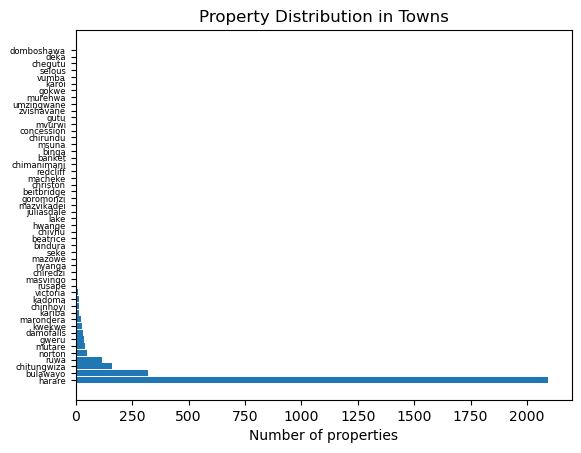

In [87]:
plt.barh(housing_data['Town'].value_counts().index, housing_data['Town'].value_counts().values, height = 0.9)
plt.yticks(fontsize = 6)
plt.title('Property Distribution in Towns')
plt.xlabel('Number of properties')
plt.show()

<br>

### Plotting the distribution of properties in towns

In [121]:
housing_data.sort_values(by = 'Price', ascending = False).head(10)

,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
1548,Borrowdale,House,75646700.0,4,1,454,harare,harare north
357,Ilanda,Townhouse Complex,13500000.0,3,2,1200,bulawayo,bulawayo east
128,Ilanda,Townhouse Complex,13500000.0,3,2,1200,bulawayo,bulawayo east
2874,Helensvale,House,5000000.0,9,1,24000,harare,harare north
2998,Borrowdale,House,3500000.0,4,1,4000,harare,harare north
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
3018,Glen Lorne,House,3200000.0,5,3,56658,harare,harare north
233,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
2721,Borrowdale Brooke,House,3200000.0,7,5,4047,harare,harare north
2333,Helensvale,Townhouse Complex,3200000.0,3,2,16187,harare,harare north


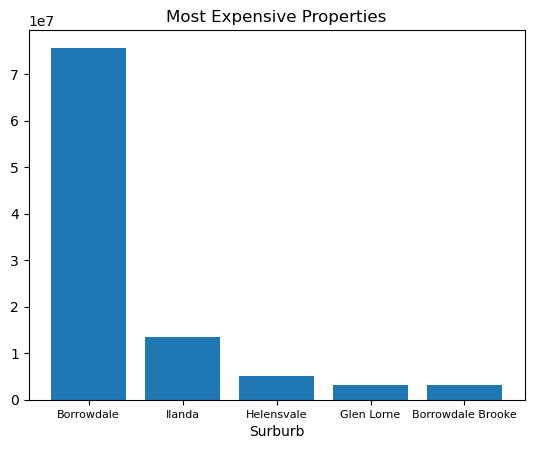

In [122]:
top_10_exp = housing_data.sort_values(by = 'Price', ascending = False).head(10)

plt.bar(top_10_exp['Surburb'].values, top_10_exp['Price'].values)
plt.xticks(fontsize = 8)
plt.title('Most Expensive Properties')
plt.xlabel('Surburb')
plt.show()

    The house in Mainway Meadows in an anomaly and the Price is not correct as it presents an exobitant price thus 11 bilion which is highly unrealistic. This an an extreme value that we need to discard from our data.
    

### Dropping extremely high values (Price) in the dataset

    After carefully looking at the distribution of the prices there's need drop extreme values in the data, below is a closer look at the distrubution of the prices again as well as location of the properties.

In [120]:
# listing the top 10 properties and their prices

housing_data.sort_values(by = 'Price', ascending = False).head(10)

,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
1548,Borrowdale,House,75646700.0,4,1,454,harare,harare north
357,Ilanda,Townhouse Complex,13500000.0,3,2,1200,bulawayo,bulawayo east
128,Ilanda,Townhouse Complex,13500000.0,3,2,1200,bulawayo,bulawayo east
2874,Helensvale,House,5000000.0,9,1,24000,harare,harare north
2998,Borrowdale,House,3500000.0,4,1,4000,harare,harare north
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
3018,Glen Lorne,House,3200000.0,5,3,56658,harare,harare north
233,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
2721,Borrowdale Brooke,House,3200000.0,7,5,4047,harare,harare north
2333,Helensvale,Townhouse Complex,3200000.0,3,2,16187,harare,harare north


    The first 4 properties have very high prices which are very much extreme from the other values.Hence need to discard these values by virtue of common knowledge that a house cannot cost as far as US$13,5 Billion dollars.

In [123]:
# Listing the index of the properties to drop

index_to_drop = [1548, 357, 128, 2874]
housing_data.drop(index_to_drop, axis = 0, inplace = True)

In [124]:
# Looking at the data after dropping the extreme values
housing_data.sort_values(by = 'Price', ascending = False).head()

,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
2998,Borrowdale,House,3500000.0,4,1,4000,harare,harare north
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
222,Glen Lorne,House,3200000.0,5,4,56650,harare,harare north
2721,Borrowdale Brooke,House,3200000.0,7,5,4047,harare,harare north
2333,Helensvale,Townhouse Complex,3200000.0,3,2,16187,harare,harare north


    The desciptive statitics show below that the average price of the property is now US$235,371 down from US$306,251 which was on the upside due to extrme values.

In [125]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,3049.0,235370.570351,3.169990e+05,700.0,60000.0,130000.0,300000.0,3.500000e+06
Beds,3049.0,3.833060,1.216146e+00,1.0,3.0,4.0,4.0,9.000000e+00
Baths,3049.0,1.909479,1.278098e+00,1.0,1.0,2.0,2.0,9.000000e+00
Area_Sqm,3049.0,674955.061988,3.622354e+07,77.0,400.0,1066.0,3325.0,2.000000e+09


### Real Average Price of property types

In [126]:
housing_data[['Property_type', 'Price', 'Beds', 'Baths', 'Area_Sqm']].groupby(['Property_type']).mean()

,Price,Beds,Baths,Area_Sqm
Property_type,,,,
Cottage,117687.500000,2.625000,1.500000,1456.312500
House,232296.194182,3.892364,1.897455,748134.710182
Townhouse Complex,271898.710247,3.325088,2.049470,1923.074205


    The average prices of the House and Townhouse Complex has drastically dropped from US$301,293 and US$364,727 to US$232,296 and US$271,899 respectively after dropping the 4 extreme values in the dataset. This shows the importance of EDA as it helps to pick insights on data quality.

### Real Distribution of the most expensive properties

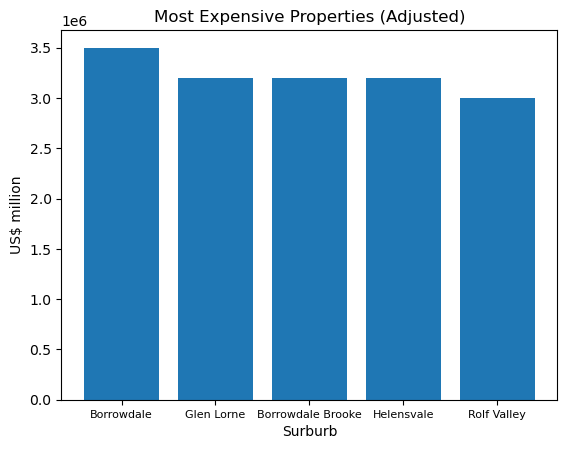

In [131]:
real_top_10_exp = housing_data.sort_values(by = 'Price', ascending = False).head(10)

plt.bar(real_top_10_exp['Surburb'].values, real_top_10_exp['Price'].values)
plt.xticks(fontsize = 8)
plt.title('Most Expensive Properties (Adjusted)')
plt.xlabel('Surburb')
plt.ylabel('US$ million')
plt.show()

<br>

### Most affordable properties

In [135]:
housing_data.sort_values(by = 'Price', ascending = True).head()

,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
2057,Glen Lorne,Townhouse Complex,700.0,3,1,4000,harare,harare north
1434,Strathaven,House,800.0,2,2,200,harare,harare west
1317,Highlands,House,2500.0,4,1,4000,harare,harare north
1330,Chisipite,House,2500.0,4,1,4046,harare,harare north
1995,Umwinsidale,House,3200.0,4,1,80937,harare,harare north


    The most affordable properties cost as mucch as US$700 in Glen Lorne and Strathaven costing $800, this is not a realistic price for these properties considering their location. Common knowledge suggests that these prices are anomalies and are not true. Prices as low as these could reflect as rentals for these properties